
# Cross Section Analysis

The MetPy function `metpy.interpolate.cross_section` can obtain a cross-sectional slice through
gridded data.


In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.interpolate import cross_section

**Getting the data**

This example uses [NARR reanalysis data](
https://www.ncei.noaa.gov/products/weather-climate-models/north-american-regional)
for 18 UTC 04 April 1987 from NCEI.

We use MetPy's CF parsing to get the data ready for use, and squeeze down the size-one time
dimension.



In [2]:
data = xr.open_dataset(get_test_data('narr_example.nc', False))
data = data.metpy.parse_cf().squeeze()
print(data)

<xarray.Dataset>
Dimensions:              (isobaric: 29, y: 118, x: 292)
Coordinates:
    time                 datetime64[ns] 1987-04-04T18:00:00
  * isobaric             (isobaric) float64 1e+03 975.0 950.0 ... 125.0 100.0
  * y                    (y) float64 -3.087e+06 -3.054e+06 ... 7.114e+05
  * x                    (x) float64 -3.977e+06 -3.945e+06 ... 5.47e+06
    metpy_crs            object Projection: lambert_conformal_conic
Data variables:
    Temperature          (isobaric, y, x) float32 ...
    Lambert_Conformal    |S1 ...
    lat                  (y, x) float64 ...
    lon                  (y, x) float64 ...
    u_wind               (isobaric, y, x) float32 ...
    v_wind               (isobaric, y, x) float32 ...
    Geopotential_height  (isobaric, y, x) float32 ...
    Specific_humidity    (isobaric, y, x) float32 ...
Attributes: (12/14)
    Conventions:              CF-1.0
    Originating_center:       US National Weather Service - NCEP(WMC) (7)
    Originating_subcenter

Define start and end points:



In [5]:
start = (37.0, -105.0)
end = (35.5, -65.0)

Get the cross section, and convert lat/lon to supplementary coordinates:



In [6]:
cross = cross_section(data, start, end).set_coords(('lat', 'lon'))
print(cross)

<xarray.Dataset>
Dimensions:              (isobaric: 29, index: 100)
Coordinates:
    time                 datetime64[ns] 1987-04-04T18:00:00
  * isobaric             (isobaric) float64 1e+03 975.0 950.0 ... 125.0 100.0
    metpy_crs            object Projection: lambert_conformal_conic
    x                    (index) float64 1.818e+05 2.18e+05 ... 3.712e+06
    y                    (index) float64 -1.454e+06 -1.447e+06 ... -5.573e+05
  * index                (index) int64 0 1 2 3 4 5 6 7 ... 93 94 95 96 97 98 99
    lat                  (index) float64 37.0 37.05 37.11 ... 35.66 35.58 35.5
    lon                  (index) float64 -105.0 -104.6 -104.2 ... -65.39 -65.0
Data variables:
    Temperature          (isobaric, index) float64 287.7 286.9 ... 211.4 211.4
    Lambert_Conformal    |S1 ...
    u_wind               (isobaric, index) float64 -2.729 0.4776 ... 24.6 23.68
    v_wind               (isobaric, index) float64 8.473 5.723 ... -1.082
    Geopotential_height  (isobaric, inde

For this example, we will be plotting potential temperature, relative humidity, and
tangential/normal winds. And so, we need to calculate those, and add them to the dataset:



In [7]:
cross['Potential_temperature'] = mpcalc.potential_temperature(
    cross['isobaric'],
    cross['Temperature']
)
cross['Relative_humidity'] = mpcalc.relative_humidity_from_specific_humidity(
    cross['isobaric'],
    cross['Temperature'],
    cross['Specific_humidity']
)
cross['u_wind'] = cross['u_wind'].metpy.convert_units('knots')
cross['v_wind'] = cross['v_wind'].metpy.convert_units('knots')
cross['t_wind'], cross['n_wind'] = mpcalc.cross_section_components(
    cross['u_wind'],
    cross['v_wind']
)

print(cross)

<xarray.Dataset>
Dimensions:                (isobaric: 29, index: 100)
Coordinates:
    time                   datetime64[ns] 1987-04-04T18:00:00
  * isobaric               (isobaric) float64 1e+03 975.0 950.0 ... 125.0 100.0
    metpy_crs              object Projection: lambert_conformal_conic
    x                      (index) float64 1.818e+05 2.18e+05 ... 3.712e+06
    y                      (index) float64 -1.454e+06 -1.447e+06 ... -5.573e+05
  * index                  (index) int64 0 1 2 3 4 5 6 ... 93 94 95 96 97 98 99
    lat                    (index) float64 37.0 37.05 37.11 ... 35.66 35.58 35.5
    lon                    (index) float64 -105.0 -104.6 -104.2 ... -65.39 -65.0
Data variables:
    Temperature            (isobaric, index) float64 287.7 286.9 ... 211.4 211.4
    Lambert_Conformal      |S1 ...
    u_wind                 (isobaric, index) float64 <Quantity([[ -5.30445235...
    v_wind                 (isobaric, index) float64 <Quantity([[16.47047637 ...
    Geopoten

Now, we can make the plot.



/home/wanghao/Install/Anaconda3/envs/env_py37/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/wanghao/Install/Anaconda3/envs/env_py37/lib/python3.7/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/wanghao/Install/Anaconda3/envs/env_py37/lib/python3.7/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/wanghao/Install/Anaconda3/envs/env_py37/lib/python3.7/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is de

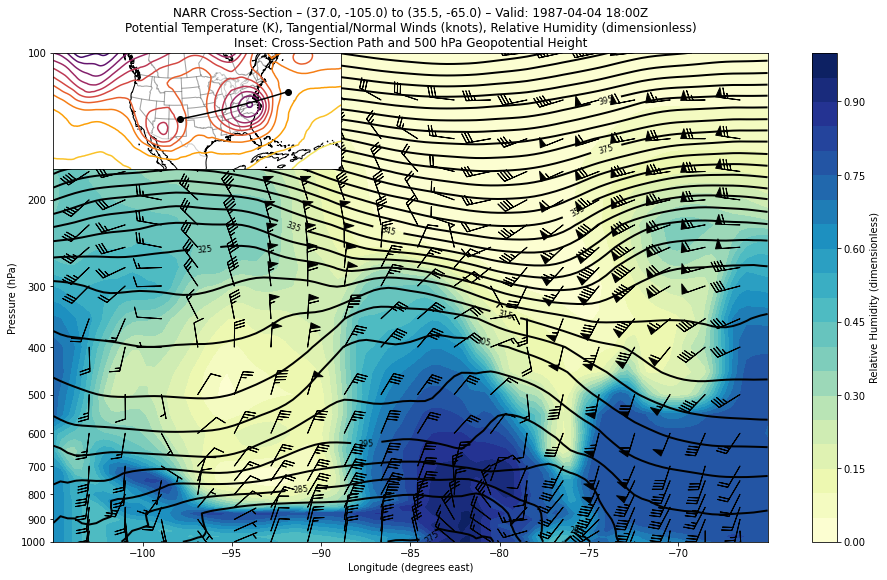

In [9]:
# Define the figure object and primary axes
fig = plt.figure(1, figsize=(16., 9.))
ax = plt.axes()

# Plot RH using contourf
rh_contour = ax.contourf(cross['lon'], cross['isobaric'], cross['Relative_humidity'],
                         levels=np.arange(0, 1.05, .05), cmap='YlGnBu')
rh_colorbar = fig.colorbar(rh_contour)

# Plot potential temperature using contour, with some custom labeling
theta_contour = ax.contour(cross['lon'], cross['isobaric'], cross['Potential_temperature'],
                           levels=np.arange(250, 450, 5), colors='k', linewidths=2)
theta_contour.clabel(theta_contour.levels[1::2], fontsize=8, colors='k', inline=1,
                     inline_spacing=8, fmt='%i', rightside_up=True, use_clabeltext=True)

# Plot winds using the axes interface directly, with some custom indexing to make the barbs
# less crowded
wind_slc_vert = list(range(0, 19, 2)) + list(range(19, 29))
wind_slc_horz = slice(5, 100, 5)
ax.barbs(cross['lon'][wind_slc_horz], cross['isobaric'][wind_slc_vert],
         cross['t_wind'][wind_slc_vert, wind_slc_horz],
         cross['n_wind'][wind_slc_vert, wind_slc_horz], color='k')

# Adjust the y-axis to be logarithmic
ax.set_yscale('symlog')
ax.set_yticklabels(np.arange(1000, 50, -100))
ax.set_ylim(cross['isobaric'].max(), cross['isobaric'].min())
ax.set_yticks(np.arange(1000, 50, -100))

# Define the CRS and inset axes
data_crs = data['Geopotential_height'].metpy.cartopy_crs
ax_inset = fig.add_axes([0.125, 0.665, 0.25, 0.25], projection=data_crs)

# Plot geopotential height at 500 hPa using xarray's contour wrapper
ax_inset.contour(data['x'], data['y'], data['Geopotential_height'].sel(isobaric=500.),
                 levels=np.arange(5100, 6000, 60), cmap='inferno')

# Plot the path of the cross section
endpoints = data_crs.transform_points(ccrs.Geodetic(),
                                      *np.vstack([start, end]).transpose()[::-1])
ax_inset.scatter(endpoints[:, 0], endpoints[:, 1], c='k', zorder=2)
ax_inset.plot(cross['x'], cross['y'], c='k', zorder=2)

# Add geographic features
ax_inset.coastlines()
ax_inset.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='k', alpha=0.2, zorder=0)

# Set the titles and axes labels
ax_inset.set_title('')
ax.set_title(f'NARR Cross-Section \u2013 {start} to {end} \u2013 '
             f'Valid: {cross["time"].dt.strftime("%Y-%m-%d %H:%MZ").item()}\n'
             'Potential Temperature (K), Tangential/Normal Winds (knots), Relative Humidity '
             '(dimensionless)\nInset: Cross-Section Path and 500 hPa Geopotential Height')
ax.set_ylabel('Pressure (hPa)')
ax.set_xlabel('Longitude (degrees east)')
rh_colorbar.set_label('Relative Humidity (dimensionless)')

plt.show()

Note: The x-axis can display any variable that is the same length as the
plotted variables, including latitude. Additionally, arguments can be provided
to ``ax.set_xticklabels`` to label lat/lon pairs, similar to the default NCL output.



# 2、笛卡尔坐标转化到极坐标

In [1]:
from scipy import interpolate
import metpy.calc as mpcalc  
from metpy.units import units  
import xarray as xr   
import numpy as np 
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = '14' # 设置字体大小

In [2]:
def get_hurricane():
    u = np.array([ [2.444,7.553],
    [0.513,7.046],
    [-1.243,5.433],
    [-2.353,2.975],
    [-2.578,0.092],
    [-2.075,-1.795],
    [-0.336,-2.870],
    [2.609,-2.016] ])
    u[:,0] -= 0.098
    codes = [1] + [2]*(len(u)-2) + [2]
    u = np.append(u, -u[::-1], axis=0)
    codes += codes
    return mpath.Path(3*u, codes, closed=False)

In [3]:
f = './data/data_example.nc'

#CMA给出的台风中心
lon_t = 128.9
lat_t = 20.0

#nc数据读取
ds = xr.open_dataset(f)
lat, lon = ds.latitude, ds.longitude

uwnd = ds.u.sel(level= 500)

#azimuths是极坐标系中的角度，ranges是半径，可以根据自己需要设置
azimuths = np.linspace(0,360,73)*units.degree
ranges = np.linspace(0,1000,101)*1000*units.meter

#利用metpy库可以十分便捷的得到插值后的经纬度坐标
lon_a,lat_a = mpcalc.azimuth_range_to_lat_lon(azimuths,ranges,lon_t,lat_t)

#因为ERA5的数据分辨率是0.25°，为了保证插值后不产生NAN，边界上各扩大一个格点
lons = lon[(lon>=lon_a.min()-0.25) & (lon<=lon_a.max()+0.25)] 
lats = lat[(lat>=lat_a.min()-0.25) & (lat<=lat_a.max()+0.25)]

#构造插值前的格点矩阵
lon_s,lat_s = np.meshgrid(lons,lats)
grid_in = np.concatenate([lon_s.reshape(-1,1), lat_s.reshape(-1,1)], axis=1)
grid_out = np.concatenate([lon_a.reshape(-1,1), lat_a.reshape(-1,1)], axis=1)

#这边以变量u为例，进行插值
u_in = uwnd.sel(longitude=lons,latitude=lats)
u_out = interpolate.griddata(grid_in, np.array(u_in).flatten(), grid_out, method='cubic')
u_out = u_out.reshape((len(azimuths),len(ranges)))

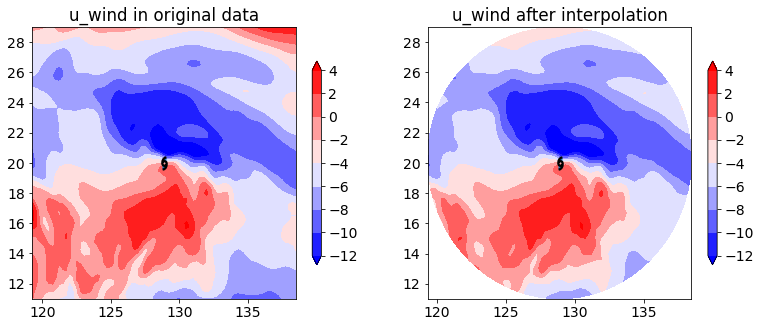

In [4]:
#画填色图检验插值数据
plt.figure(1, figsize=(13., 5.))

#插值前的u
ax1 = plt.subplot(121)
ax1.set_title('u_wind in original data')
fig1 = ax1.contourf(lons, lats, u_in, np.arange(-12,6,2), cmap='bwr', extend='both')
plt.scatter(lon_t,lat_t, s=150, marker=get_hurricane(),
    edgecolors="black", linewidth=2.3,zorder=3)
plt.colorbar(fig1,orientation='vertical',shrink=0.75)

#插值后的u
ax2 = plt.subplot(122) 
ax2.set_title('u_wind after interpolation')
fig2 = ax2.contourf(lon_a, lat_a, u_out, np.arange(-12,6,2), cmap='bwr', extend='both')
plt.scatter(lon_t,lat_t, s=150, marker=get_hurricane(),
    edgecolors="black", linewidth=2.3,zorder=3)
plt.colorbar(fig2,orientation='vertical',shrink=0.75)
plt.show()

# 3、台风方位角平均的半径-气压剖面图

In [18]:
from scipy import interpolate
import metpy.calc as mpcalc  
from metpy.units import units  
import xarray as xr   
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
# mpl.rcParams['font.sans-serif'] = ['Times New Roman']#设置默认字体
mpl.rcParams['font.size'] = '14' # 设置字体大小

In [19]:
f = './data/data_example.nc'
#CMA给出的台风中心
lon_t=128.9
lat_t=20.0

#nc数据读取
ds = xr.open_dataset(f)
lat = ds.latitude
lon = ds.longitude
levels = ds.level

ds

<xarray.Dataset>
Dimensions:    (longitude: 321, latitude: 281, level: 29)
Coordinates:
  * longitude  (longitude) float32 100.0 100.2 100.5 100.8 ... 179.5 179.8 180.0
  * latitude   (latitude) float32 60.0 59.75 59.5 59.25 ... -9.5 -9.75 -10.0
  * level      (level) int32 50 70 100 125 150 175 ... 875 900 925 950 975 1000
    time       datetime64[ns] ...
Data variables:
    u          (level, latitude, longitude) float32 ...
    v          (level, latitude, longitude) float32 ...
    vo         (level, latitude, longitude) float32 ...

In [29]:
#azimuths是极坐标系中的角度，ranges是半径，可以根据自己需要设置
azimuths = np.linspace(0,360,73)*units.degree
ranges = np.linspace(0,1000,101)*1000*units.meter 
vt_am = np.zeros((len(levels),len(ranges)))
vr_am = np.zeros((len(levels),len(ranges)))

#利用850hPa的相对涡度寻找再分析资料中的台风中心
lon_range = lon[(lon>=lon_t-2) & (lon<=lon_t+2)]
lat_range = lat[(lat>=lat_t-2) & (lat<+lat_t+2)]
vo = ds.vo.sel(level=850, longitude=lon_range, latitude=lat_range)

for m in lat_range:
    for n in lon_range:
        if vo.sel(longitude=n, latitude=m) == np.max(vo):
            lat_v = m
            lon_v = n

print(lat_v)
print(lon_v)
            
lat_v, lon_v = 20.0, 128.9
# print(lat_v)
# print(lon_v)
            
#利用metpy库可以十分便捷的得到插值后的经纬度坐标
lon_a,lat_a = mpcalc.azimuth_range_to_lat_lon(azimuths,ranges,lon_v,lat_v)

#因为ERA5的数据分辨率是0.25°，为了保证插值后不产生NAN，边界上各扩大一个格点
lons = lon[(lon>=lon_a.min()-0.25) & (lon<=lon_a.max()+0.25)] 
lats = lat[(lat>=lat_a.min()-0.25) & (lat<=lat_a.max()+0.25)]
lon_s,lat_s = np.meshgrid(lons,lats)

# print(lat_a)

<xarray.DataArray 'latitude' ()>
array(20.5, dtype=float32)
Coordinates:
    latitude  float32 20.5
    time      datetime64[ns] 2020-08-01
Attributes:
    units:      degrees_north
    long_name:  latitude
<xarray.DataArray 'longitude' ()>
array(129., dtype=float32)
Coordinates:
    longitude  float32 129.0
    time       datetime64[ns] 2020-08-01
Attributes:
    units:      degrees_east
    long_name:  longitude


In [32]:
#构造插值前后的格点矩阵
grid_in = np.concatenate([lon_s.reshape(-1,1), lat_s.reshape(-1,1)], axis=1)
grid_out = np.concatenate([lon_a.reshape(-1,1), lat_a.reshape(-1,1)], axis=1)

for j in range(0,len(levels)):
#     print(levels[j])
    u_in = ds['u'].sel(level= levels[j], longitude=lons, latitude=lats)
    v_in = ds['v'].sel(level= levels[j], longitude=lons, latitude=lats)
    u_out = interpolate.griddata(grid_in, np.array(u_in).flatten(), grid_out, method='cubic')
    v_out = interpolate.griddata(grid_in, np.array(v_in).flatten(), grid_out, method='cubic')
    u_out = u_out.reshape((len(azimuths),len(ranges)))
    v_out = v_out.reshape((len(azimuths),len(ranges)))

    #计算切向风、径向风
    vt = np.zeros((len(azimuths),len(ranges)))
    vr = np.zeros((len(azimuths),len(ranges)))

    for k in range(0,len(azimuths)):
        vt[k,:] = v_out[k,:]*np.cos(azimuths[k]*np.pi/180)-u_out[k,:]*np.sin(azimuths[k]*np.pi/180)
        vr[k,:] = u_out[k,:]*np.cos(azimuths[k]*np.pi/180)+v_out[k,:]*np.sin(azimuths[k]*np.pi/180)
    #计算方位角平均
    vt_am[j,:] = np.mean(vt,axis=0)
    vr_am[j,:] = np.mean(vr,axis=0)
    
for ilev in np.arange(len(levels)):
    print(levels[ilev].values)
    print(vt_am[ilev, :])

50
[-2.0137063534567754 -2.0009669507596626 -1.9503877648413648 -1.8605209918106385 -1.740444403095415 -1.5957070152640973 -1.4322624207344026 -1.2596832667436026 -1.089054695363759 -0.9267067354289943 -0.7777254639205989 -0.6415472537666633 -0.5160843377630808 -0.3942993978183128 -0.270656877373342 -0.13931651954100005 -0.002381304911180411 0.14045150473294726 0.28381824082162943 0.41825587206065595 0.5376650796380689 0.635874589918671 0.7070964597105533 0.7475885379714322 0.7550237865068009 0.7320160230739206 0.6831766213372762 0.6121058114603466 0.5221897776780114 0.4188119908848071 0.3094078977726068 0.20021314323288616 0.09514037071416102 -0.00018766795639604017 -0.0827145294942348 -0.1503355652354274 -0.20155399827148682 -0.23663200015719899 -0.2578565734619976 -0.2666819291582115 -0.2658862669491545 -0.25940059400250365 -0.25065358465615467 -0.24204180503983905 -0.23654149380054207 -0.23691856817310325 -0.24426560281370913 -0.2598856423933789 -0.28446331429297755 -0.318523811393

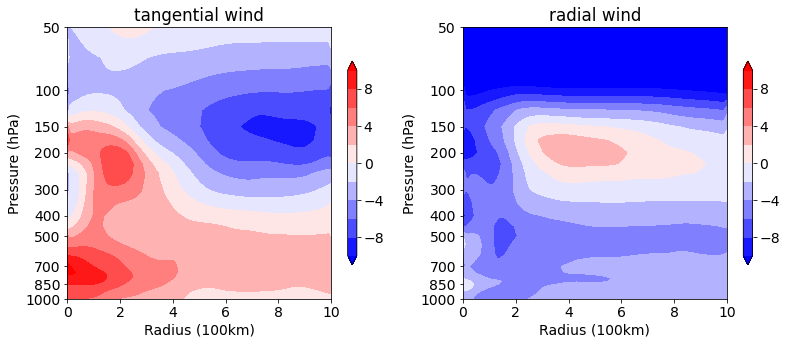

In [31]:
#为了图形美观，做2次9点平滑
vt_am = mpcalc.smooth_n_point(vt_am,9,2) 
vr_am = mpcalc.smooth_n_point(vr_am,9,2) 

#画图
plt.figure(1, figsize=(13., 5.))

ax1 = plt.subplot(121) 
ax1.invert_yaxis() 
ax1.set_yscale('symlog')
ax1.set_yticks([1000,850,700,500,400,300,200,150,100,50])
ax1.set_yticklabels([1000,850,700,500,400,300,200,150,100,50])        
ax1.set_xticks(range(0,1200000,200000))
ax1.set_xticklabels(range(0,12,2))
ax1.set_ylabel('Pressure (hPa)')
ax1.set_xlabel('Radius (100km)')
ax1.set_title('tangential wind')
fig1 = ax1.contourf(ranges, levels, vt_am, 
                    np.arange(-10,12,2),
                    cmap='bwr',
                    extend='both')
plt.colorbar(fig1,orientation='vertical',shrink=0.75)

ax2 = plt.subplot(122) 
ax2.invert_yaxis() 
ax2.set_yscale('symlog')
ax2.set_yticks([1000,850,700,500,400,300,200,150,100,50])
ax2.set_yticklabels([1000,850,700,500,400,300,200,150,100,50])        
ax2.set_xticks(range(0,1200000,200000))
ax2.set_xticklabels(range(0,12,2))
ax2.set_ylabel('Pressure (hPa)')
ax2.set_xlabel('Radius (100km)')
ax2.set_title('radial wind')
fig2 = ax2.contourf(ranges, levels, vr_am, 
                    np.arange(-10,12,2),
                    cmap='bwr',
                    extend='both')
plt.colorbar(fig2,orientation='vertical',shrink=0.75)
    
plt.show()